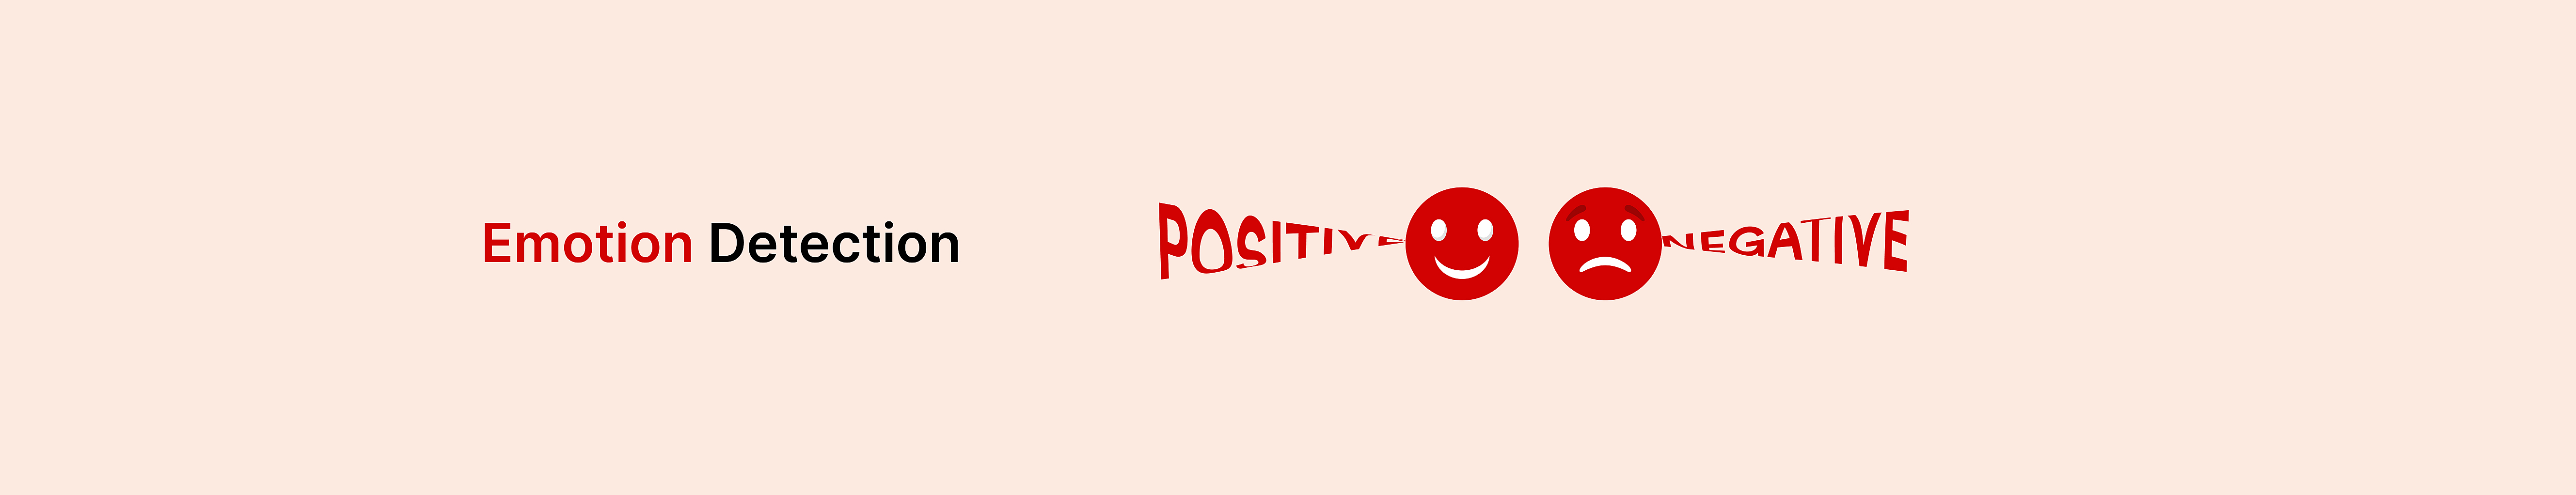

<h2><center>Starter Code for Emotion Detection using simple transformers</center></h2>







### What we are going to Learn

  - Basics of Natual Language Preprocessing
  - Using transformers to train, validate & test the  model for text classification.
  - Testing and Submitting the Results to the Challenge. 

# Natural Language Preprocessing 🗣️ 

Now Natural Language Preprocessing ( or **NLP** in short ), actually allows Machines to understand human languages and and do certain kind of task such as classification, for ex. 

  - Gmail   -   Classifying emails as Spam/Not Spam. 
  
  - GPT-3 ( A powerful language model by [OpenAI](https://openai.com/) ) -   Generating blogs so good that even humans couldn't classify accuractly if the blog was generated by machine or human 🤯   

and tons of others....




### Downloading Dataset

AIcrowd had a recent addition that allows you to directly download the dataset from any challenge using AIcrowd CLI. 

So we will first need to download the python library by AIcrowd that will allow us to download the dataset by just inputting the API key. 

In [ ]:
!pip install aicrowd-cli

In [ ]:
API_KEY = '' # Please get your your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

In [ ]:
# Downloading the Dataset
!mkdir data
!aicrowd dataset download --challenge emotion-detection -j 3 -o data

### Downloading & Importing Libraries

Here we are going to use simpletransformers to do our text classification task, [simpletransformers](https://simpletransformers.ai/). Simple Transformers is a Natural Language Processing (NLP) library designed to simplify the usage of Transformer models without having to compromise on utility.

It is built on the amazing work of Hugging Face and their Transformers library.

# Why simple transformers
Simple Transformers is designed around the way a person will typically use a Transformers model. At the highest level, Simple Transformers is branched into common NLP tasks such as text classification, question answering, and language modeling. Each of these tasks have their own task-specific Simple Transformers model. While all of the task-specific models maintain a consistent usage pattern (initialize, train, evaluate, predict), this separation allows the freedom to adapt the models to their specific use case. To list but a few of the benefits;

* Input data formats are optimized for the task
* Outputs are clean and ready-to-use for the task with minimal to no post-processing required
* Unique configuration options for each task, while sharing a large, common base of configuration options across all tasks
* No boilerplate code attempting to squeeze together things that don’t fit (Simple Transformers scripts rarely need to be longer than a few lines)
* Common sense defaults to get started quickly, so that you can configure as little or as much as you want to


Simple transformers supports 10 different types of tasks as below
1. TEXT CLASSIFICATION
2. NAMED ENTITY RECOGNITION
3. QUESTION ANSWERING
4. LANGUAGE MODELING
5. T5 MODEL
6. SEQ2SEQ
7. CONVERSATIONAL AI
8. TEXT REPRESENTATION
9. LANGUAGE GENERATION
10. MULTI-MODAL CLASSIFICATION

For the purpose of this entire challenge we can use 1, 5, 6. For first 2 challenges 1 and 5 would suffice.

In [ ]:
!pip install simpletransformers rich emoji 

In [ ]:
import pandas as pd

import random
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score
import os
from simpletransformers.classification import ClassificationModel, ClassificationArgs

# To make things more beautiful! 
from rich.console import Console
from rich.table import Table
from rich import pretty
pretty.install()


# Seeding everything for getting same results 
random.seed(1)
#spacy.util.fix_random_seed(1)


# function to display YouTube videos
from IPython.display import YouTubeVideo

### Reading Dataset

Reading the necessary files to train, validation & submit our results! 

In [ ]:
train_dataset = pd.read_csv("data/train.csv")
validation_dataset = pd.read_csv("data/val.csv")[1:]
test_dataset = pd.read_csv("data/test.csv")
train_dataset

# Text Classification  🧠

In this section, we are going to train a text classifier and do some validation tests.  For this we need to use the below two functions to setup our transformers model.

1. ClassificationArgs - Used for the model parameters like the number of epochs, lazy loading, sliding window etc. For other parameters refer the github.
2. ClassificationModel - Used to create the classification model based on the tranformers type like bert, albert etc and its models. [configuration parameters](https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model) for adjusting the learning rate etc

For evaluation and making predictions eval_model and predict can be used.


## Creating the Model

Transformers based model using simple transformers

In [ ]:
model_args = ClassificationArgs(num_train_epochs=1, 
                                evaluate_during_training=True, 
                                use_early_stopping=True)

# Create a ClassificationModel
model = ClassificationModel(
     "bert", 'bert-base-uncased', args=model_args, 
)



In [ ]:
def f1_scores(y_true, y_pred):
  return f1_score(y_true, y_pred)

## Training

And there we go! It's finally the time to start the training!

In [ ]:
# Train the model
model.train_model(train_dataset,eval_df=validation_dataset, metrics=f1_scores)



## Validation

Now we have trained the model, let's see the results for unseen validation dataset. 

In [ ]:
df = pd.DataFrame(model_outputs)

In [ ]:
predictions, raw_outputs = model.predict(list(validation_dataset['text'].values))

In [ ]:
# Getting F1 & Accuracy score of validation predictions
f1 = f1_score(validation_dataset['label'], predictions)
accuracy = accuracy_score(validation_dataset['label'], predictions)

print(f"Validation F1 Score  : {f1} and Accuracy Score {accuracy}")

# Submitting Results 📄

Okay, this is the last section 😌 , let's get out testing results from the model real quick and submit our prediction directly using AIcrowd CLI

In [ ]:


predictions, raw_outputs = model.predict(list(test_dataset['text'].values))

In [ ]:
predictions

In [ ]:
# Applying the predictions to the labels column of the sample submission 
test_dataset['label'] = predictions
test_dataset


**Note : Please make sure that there should be filename `submission.csv` in `assets` folder before submitting it**

In [ ]:
!mkdir assets

# Saving the sample submission in assets directory
test_dataset.to_csv(os.path.join("assets", "submission.csv"), index=False)

## Uploading the Results 
**Note : Please save the notebook before submitting it (Ctrl + S)**

In [ ]:
!aicrowd notebook submit -c emotion-detection -a assets --no-verify

Congratulations 🎉 you did it, but there still a lot of improvement that can be made, data exploration is one of the most import pipelines in machine learning, especially in competitions, so maybe see if there is data imbalance, how minimize it's effects, maybe looking first few rows to each dataset. Or maybe improving the score, have fun!

And btw -

> Don't be shy to ask question related to any errors you are getting or doubts in any part of this notebook in [discussion forum](https://www.aicrowd.com/challenges/ai-blitz-9/problems/emotion-detection/discussion) or in [AIcrowd Discord sever](https://discord.gg/T6uZSWBMSZ), AIcrew will be happy to help you :)

Also, wanna give us your valuable feedback for next blitz or wanna work with us creating blitz challanges ? Let us know! 

In [ ]:
!rm -rf cache_dir
!rm -rf outputs
!rm -rf runs